Adarsh Gupta </br>220101003 </br>CSE

# Task 2 Submission Coding Week ML

In [134]:
import pandas as pd
import numpy as np

In [135]:
ipl_data = pd.read_csv('IPL_2023.csv')

In [136]:
ipl_data.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16


## Cleaning Data

In [137]:
#Seperating Team Name
ipl_data[['Player','Team']] = ipl_data['Player'].str.split('\n', expand=True)

In [138]:
ipl_data.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
0,1,Faf Du Plessis,14,14,1,730,84,56.15,475,153.68,0,8,60,36,RCB
1,2,Shubman Gill,14,14,2,680,104*,56.67,446,152.46,2,4,67,22,GT
2,3,Virat Kohli,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,RCB
3,4,Yashasvi Jaiswal,14,14,1,625,124,48.08,382,163.61,1,5,82,26,RR
4,5,Devon Conway,14,13,2,585,92*,53.18,422,138.62,0,6,69,16,CSK


In [139]:
#Converting to Correct Data Types
#HS and Avg fields have missing data so accounting for those fields later!
ipl_data[['Mat','Inns','NO','Runs','BF','SR','100','50','4s','6s']] = ipl_data[['Mat','Inns','NO','Runs','BF','SR','100','50','4s','6s']].astype('float32')


### Handling Missing Values (Both standard and non-standard) in HS and Avg Columns

In [140]:
ipl_data.isnull().sum()

POS       0
Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
Team      0
dtype: int64

In [141]:
#No standard missing values
ipl_data['Avg'].unique()

array(['56.15', '56.67', '53.25', '48.08', '53.18', '36.86', '42.58',
       '42.00', '59.25', '49.78', '31.36', '31.77', '28.86', '33.33',
       '28.00', '38.50', '54.43', '41.44', '30.67', '30.17', '30.08',
       '32.55', '25.57', '22.36', '23.77', '37.50', '28.90', '41.00',
       '22.08', '35.63', '28.30', '35.25', '34.88', '27.60', '45.67',
       '34.25', '22.75', '27.00', '26.10', '36.43', '22.55', '26.33',
       '20.64', '20.55', '44.60', '27.25', '30.86', '30.57', '29.86',
       '21.11', '26.57', '20.00', '42.25', '17.78', '22.29', '21.86',
       '21.71', '35.75', '11.67', '27.80', '16.88', '14.22', '15.25',
       '19.50', '16.43', '19.00', '14.13', '13.75', '13.25', '26.25',
       '51.50', '47.50', '30.33', '45.00', '14.83', '13.00', '25.67',
       '23.67', '69.00', '6.90', '11.17', '13.20', '15.00', '19.67',
       '29.00', '8.67', '16.33', '10.50', '14.00', '7.80', '12.33',
       '8.75', '-', '16.50', '8.25', '16.00', '15.50', '25.00', '12.50',
       '23.00', '11.

In [159]:
#I dont know why but this code is behaving weirdly, sometime it runs and sometimes it throws an error
#Everytime I am rerunning it from top it's throwing an error, which is generally fixed by rewriting it, 
#idk what's happening
for index, rows in ipl_data.iterrows():
    if ipl_data['Avg'][index] == '-':
        ipl_data['Avg'][index] = ipl_data.loc[['Runs']][index]/ipl_data.loc[['Inns']][index]

In [160]:
ipl_data['Avg'].unique()

array([56.15, 56.67, 53.25, 48.08, 53.18, 36.86, 42.58, 42.  , 59.25,
       49.78, 31.36, 31.77, 28.86, 33.33, 28.  , 38.5 , 54.43, 41.44,
       30.67, 30.17, 30.08, 32.55, 25.57, 22.36, 23.77, 37.5 , 28.9 ,
       41.  , 22.08, 35.63, 28.3 , 35.25, 34.88, 27.6 , 45.67, 34.25,
       22.75, 27.  , 26.1 , 36.43, 22.55, 26.33, 20.64, 20.55, 44.6 ,
       27.25, 30.86, 30.57, 29.86, 21.11, 26.57, 20.  , 42.25, 17.78,
       22.29, 21.86, 21.71, 35.75, 11.67, 27.8 , 16.88, 14.22, 15.25,
       19.5 , 16.43, 19.  , 14.13, 13.75, 13.25, 26.25, 51.5 , 47.5 ,
       30.33, 45.  , 14.83, 13.  , 25.67, 23.67, 69.  ,  6.9 , 11.17,
       13.2 , 15.  , 19.67, 29.  ,  8.67, 16.33, 10.5 , 14.  ,  7.8 ,
       12.33,  8.75, 16.5 ,  8.25, 16.  , 15.5 , 25.  , 12.5 , 23.  ,
       11.5 , 11.  , 21.  ,  7.  ,  3.  , 10.  ,  9.5 ,  9.  , 17.  ,
        8.5 ,  5.33,  7.5 ,  4.67, 12.  ,  6.  ,  3.33,  2.33,  3.5 ,
        4.  ,  2.  ,  1.5 ,  1.  ,  0.5 ], dtype=float32)

In [161]:
#Converting Data in Avg column to float32 as well as rounding to 2 places
ipl_data['Avg'] = round(ipl_data['Avg'].astype('float32'),2)

In [162]:
ipl_data['Avg'].unique()

array([56.15, 56.67, 53.25, 48.08, 53.18, 36.86, 42.58, 42.  , 59.25,
       49.78, 31.36, 31.77, 28.86, 33.33, 28.  , 38.5 , 54.43, 41.44,
       30.67, 30.17, 30.08, 32.55, 25.57, 22.36, 23.77, 37.5 , 28.9 ,
       41.  , 22.08, 35.63, 28.3 , 35.25, 34.88, 27.6 , 45.67, 34.25,
       22.75, 27.  , 26.1 , 36.43, 22.55, 26.33, 20.64, 20.55, 44.6 ,
       27.25, 30.86, 30.57, 29.86, 21.11, 26.57, 20.  , 42.25, 17.78,
       22.29, 21.86, 21.71, 35.75, 11.67, 27.8 , 16.88, 14.22, 15.25,
       19.5 , 16.43, 19.  , 14.13, 13.75, 13.25, 26.25, 51.5 , 47.5 ,
       30.33, 45.  , 14.83, 13.  , 25.67, 23.67, 69.  ,  6.9 , 11.17,
       13.2 , 15.  , 19.67, 29.  ,  8.67, 16.33, 10.5 , 14.  ,  7.8 ,
       12.33,  8.75, 16.5 ,  8.25, 16.  , 15.5 , 25.  , 12.5 , 23.  ,
       11.5 , 11.  , 21.  ,  7.  ,  3.  , 10.  ,  9.5 ,  9.  , 17.  ,
        8.5 ,  5.33,  7.5 ,  4.67, 12.  ,  6.  ,  3.33,  2.33,  3.5 ,
        4.  ,  2.  ,  1.5 ,  1.  ,  0.5 ], dtype=float32)

In [163]:
#For HS Column,
ipl_data['HS'].unique()

array(['84', '104*', '101*', '124', '92*', '86', '103*', '92', '67*',
       '104', '75', '77', '95', '52', '100*', '99*', '89*', '66*', '73',
       '62', '103', '65', '49*', '56*', '66', '63*', '81', '61', '54',
       '71*', '94', '55', '84*', '74', '74*', '83', '46', '50', '59*',
       '42', '67', '62*', '87', '45*', '64', '82*', '37*', '41*', '25*',
       '34*', '70', '30', '57', '54*', '63', '27*', '36', '23', '68',
       '51', '32*', '79*', '29*', '64*', '20*', '20', '41', '69', '17',
       '38', '24*', '26', '17*', '27', '25', '23*', '19', '12*', '10*',
       '18', '18*', '13*', '12', '7*', '19*', '6*', '15*', '5', '16*',
       '15', '16', '13', '8', '11', '9', '7', '10', '9*', '4', '6', '3*',
       '2*', '2', '1*', '1'], dtype=object)

In [164]:
#We need to account for the * at the end and also convert to float32
#Accounting for * using regex
import re

In [165]:
ipl_data.loc[ipl_data['HS'].str.contains('\*',regex=True)]

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
1,2,Shubman Gill,14.0,14.0,2.0,680.0,104*,56.669998,446.0,152.460007,2.0,4.0,67.0,22.0,GT
2,3,Virat Kohli,14.0,14.0,2.0,639.0,101*,53.250000,457.0,139.820007,2.0,6.0,65.0,16.0,RCB
4,5,Devon Conway,14.0,13.0,2.0,585.0,92*,53.180000,422.0,138.619995,0.0,6.0,69.0,16.0,CSK
6,7,Suryakumar Yadav,14.0,14.0,2.0,511.0,103*,42.580002,276.0,185.139999,1.0,4.0,56.0,24.0,MI
8,9,Rinku Singh,14.0,14.0,6.0,474.0,67*,59.250000,317.0,149.520004,0.0,4.0,31.0,29.0,KKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,155,Deepak Chahar,8.0,1.0,1.0,1.0,1*,1.000000,2.0,50.000000,0.0,0.0,0.0,0.0,CSK
155,156,Mohit Rathee,1.0,1.0,1.0,1.0,1*,1.000000,2.0,50.000000,0.0,0.0,0.0,0.0,PBKS
156,157,Josh Hazlewood,3.0,1.0,1.0,1.0,1*,1.000000,2.0,50.000000,0.0,0.0,0.0,0.0,RCB
157,158,Mohammed Siraj,14.0,2.0,1.0,1.0,1*,1.000000,2.0,50.000000,0.0,0.0,0.0,0.0,RCB


In [169]:
#Itterating rowwise through the upper matrix and stripping the *
for index, row in ipl_data.loc[ipl_data['HS'].str.contains('\*',regex=True)].iterrows():
    ipl_data['HS'][index] = ipl_data['HS'][index].rstrip('\*')
    #I know I should use .loc to actually work with a copy but that just keep giving me error for some reason

In [170]:
ipl_data.loc[ipl_data['HS'].str.contains('\*',regex=True)]

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team


In [171]:
ipl_data['HS'].unique()

array(['84', '104', '101', '124', '92', '86', '103', '67', '75', '77',
       '95', '52', '100', '99', '89', '66', '73', '62', '65', '49', '56',
       '63', '81', '61', '54', '71', '94', '55', '74', '83', '46', '50',
       '59', '42', '87', '45', '64', '82', '37', '41', '25', '34', '70',
       '30', '57', '27', '36', '23', '68', '51', '32', '79', '29', '20',
       '69', '17', '38', '24', '26', '19', '12', '10', '18', '13', '7',
       '6', '15', '5', '16', '8', '11', '9', '4', '3', '2', '1'],
      dtype=object)

In [172]:
ipl_data['HS'] = round(ipl_data['HS'].astype('float32'),2)

In [173]:
ipl_data['HS'].unique()

array([ 84., 104., 101., 124.,  92.,  86., 103.,  67.,  75.,  77.,  95.,
        52., 100.,  99.,  89.,  66.,  73.,  62.,  65.,  49.,  56.,  63.,
        81.,  61.,  54.,  71.,  94.,  55.,  74.,  83.,  46.,  50.,  59.,
        42.,  87.,  45.,  64.,  82.,  37.,  41.,  25.,  34.,  70.,  30.,
        57.,  27.,  36.,  23.,  68.,  51.,  32.,  79.,  29.,  20.,  69.,
        17.,  38.,  24.,  26.,  19.,  12.,  10.,  18.,  13.,   7.,   6.,
        15.,   5.,  16.,   8.,  11.,   9.,   4.,   3.,   2.,   1.],
      dtype=float32)

## Exploring Data using Visualisation

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

### Team Wise Study

In [1]:
team_data = ipl_data.groupby('Team').describe()

NameError: name 'ipl_data' is not defined

In [176]:
imp_team_data = team_data[[('POS','mean'),('Mat','count'),('100','count'),('4s','count'),('6s','count'),('Avg','mean'),('SR','mean')]]

In [177]:
imp_team_data.sort_values(('POS','mean'))

,POS,Mat,100,4s,6s,Avg,SR
,mean,count,count,count,count,mean,mean
Team,,,,,,,
CSK,67.727273,11.0,11.0,11.0,11.0,25.770000,128.372726
GT,68.666667,12.0,12.0,12.0,12.0,28.098333,129.794998
PBKS,74.437500,16.0,16.0,16.0,16.0,19.995625,126.900002
MI,75.133333,15.0,15.0,15.0,15.0,24.088667,134.050003
SRH,80.473684,19.0,19.0,19.0,19.0,21.896843,133.154205
KKR,81.437500,16.0,16.0,16.0,16.0,17.620001,124.270630
RR,81.571429,14.0,14.0,14.0,14.0,18.075714,117.635719
LSG,88.578947,19.0,19.0,19.0,19.0,19.063158,116.654205


In [178]:
teamSR = list(imp_team_data[('SR','mean')])

In [179]:
team = list(imp_team_data.index)

<BarContainer object of 10 artists>

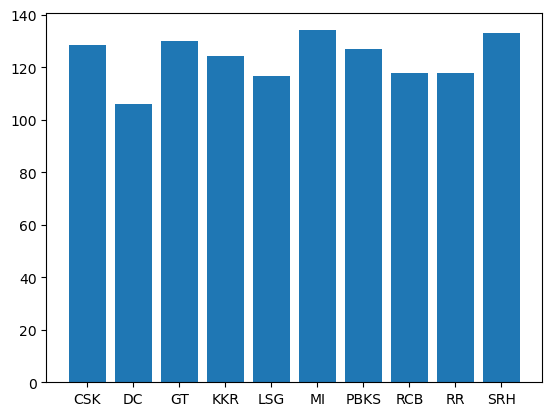

In [180]:
#Graphing Team wise Strike Rate
plt.bar(team, teamSR)

### All interrelations between various quantities for each player

We care about Runs HS, Avg, (idk what BF is sorry), SR, 100, 50, 6s and 4s of each player and want to see coorelation between all these quantities

In [181]:
#Making all the required list of data
Runs = list(ipl_data['Runs'])
HS = list(ipl_data['HS'])
Avg = list(ipl_data['Avg'])
SR = list(ipl_data['SR'])
hundreds = list(ipl_data['100'])
fifties = list(ipl_data['50'])
fours = list(ipl_data['4s'])
sixes = list(ipl_data['6s'])

#### How everything is related to HS

Text(0.5, 1.0, '6s vs HS')

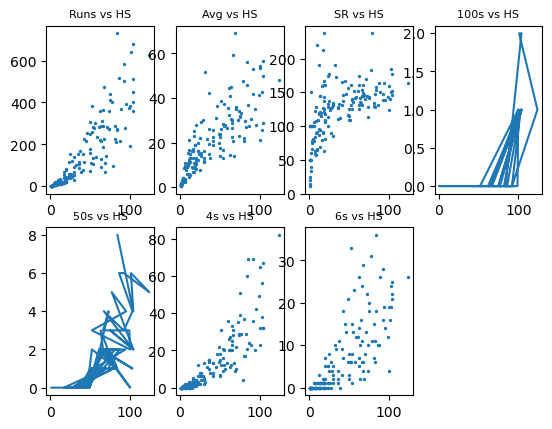

In [182]:
plt.subplot(2,4,1)
plt.scatter(HS, Runs, s=2)
plt.title('Runs vs HS', fontsize =8)

plt.subplot(2,4,2)
plt.scatter(HS, Avg, s=2)
plt.title('Avg vs HS', fontsize =8)

plt.subplot(2,4,3)
plt.scatter(HS, SR, s=2)
plt.title('SR vs HS', fontsize =8)

plt.subplot(2,4,4)
plt.plot(HS, hundreds)
plt.title('100s vs HS', fontsize =8)

plt.subplot(2,4,5)
plt.plot(HS, fifties)
plt.title('50s vs HS', fontsize = 8)

plt.subplot(2,4,6)
plt.scatter(HS, fours, s=2)
plt.title('4s vs HS', fontsize =8)

plt.subplot(2,4,7)
plt.scatter(HS, sixes, s=2)
plt.title('6s vs HS', fontsize =8)

#### How everything is related to Runs

Text(0.5, 1.0, '6s vs Runs')

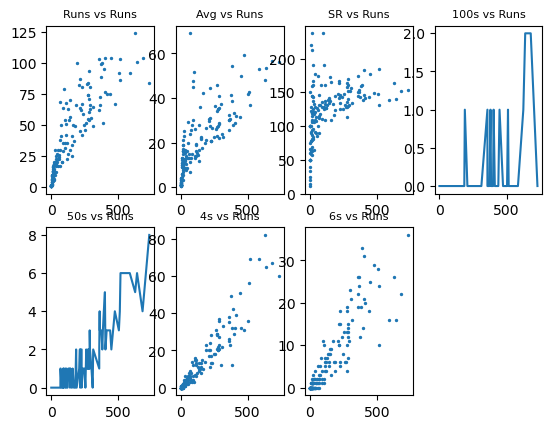

In [183]:
plt.subplot(2,4,1)
plt.scatter(Runs, HS, s=2)
plt.title('Runs vs Runs', fontsize =8)

plt.subplot(2,4,2)
plt.scatter(Runs, Avg, s=2)
plt.title('Avg vs Runs', fontsize =8)

plt.subplot(2,4,3)
plt.scatter(Runs, SR, s=2)
plt.title('SR vs Runs', fontsize =8)

plt.subplot(2,4,4)
plt.plot(Runs, hundreds)
plt.title('100s vs Runs', fontsize =8)

plt.subplot(2,4,5)
plt.plot(Runs, fifties)
plt.title('50s vs Runs', fontsize = 8)

plt.subplot(2,4,6)
plt.scatter(Runs, fours, s=2)
plt.title('4s vs Runs', fontsize =8)

plt.subplot(2,4,7)
plt.scatter(Runs, sixes, s=2)
plt.title('6s vs Runs', fontsize =8)

#### How everything is related to Avg

Text(0.5, 1.0, '6s vs Avg')

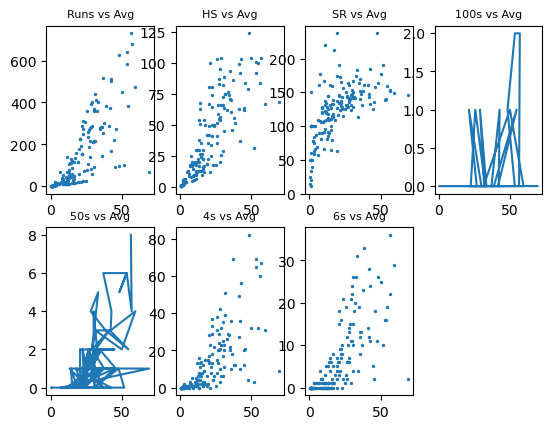

In [184]:
plt.subplot(2,4,1)
plt.scatter(Avg, Runs, s=2)
plt.title('Runs vs Avg', fontsize =8)

plt.subplot(2,4,2)
plt.scatter(Avg, HS, s=2)
plt.title('HS vs Avg', fontsize =8)

plt.subplot(2,4,3)
plt.scatter(Avg, SR, s=2)
plt.title('SR vs Avg', fontsize =8)

plt.subplot(2,4,4)
plt.plot(Avg, hundreds)
plt.title('100s vs Avg', fontsize =8)

plt.subplot(2,4,5)
plt.plot(Avg, fifties)
plt.title('50s vs Avg', fontsize = 8)

plt.subplot(2,4,6)
plt.scatter(Avg, fours, s=2)
plt.title('4s vs Avg', fontsize =8)

plt.subplot(2,4,7)
plt.scatter(Avg, sixes, s=2)
plt.title('6s vs Avg', fontsize =8)

#### How everything is related to SR

Text(0.5, 1.0, '6s vs SR')

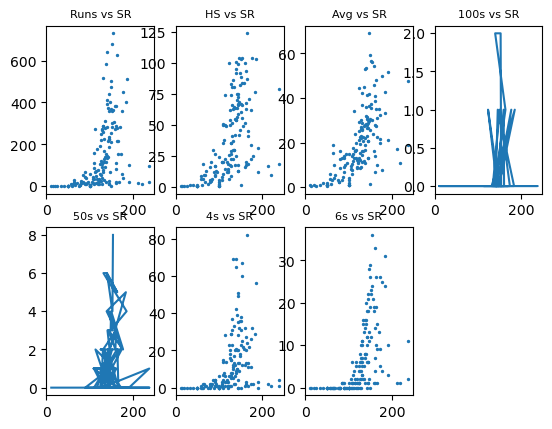

In [185]:
plt.subplot(2,4,1)
plt.scatter(SR, Runs, s=2)
plt.title('Runs vs SR', fontsize =8)

plt.subplot(2,4,2)
plt.scatter(SR, HS, s=2)
plt.title('HS vs SR', fontsize =8)

plt.subplot(2,4,3)
plt.scatter(SR, Avg, s=2)
plt.title('Avg vs SR', fontsize =8)

plt.subplot(2,4,4)
plt.plot(SR, hundreds)
plt.title('100s vs SR', fontsize =8)

plt.subplot(2,4,5)
plt.plot(SR, fifties)
plt.title('50s vs SR', fontsize = 8)

plt.subplot(2,4,6)
plt.scatter(SR, fours, s=2)
plt.title('4s vs SR', fontsize =8)

plt.subplot(2,4,7)
plt.scatter(SR, sixes, s=2)
plt.title('6s vs SR', fontsize =8)

#### How everything is related to 100s

Text(0.5, 1.0, '6s vs 100s')

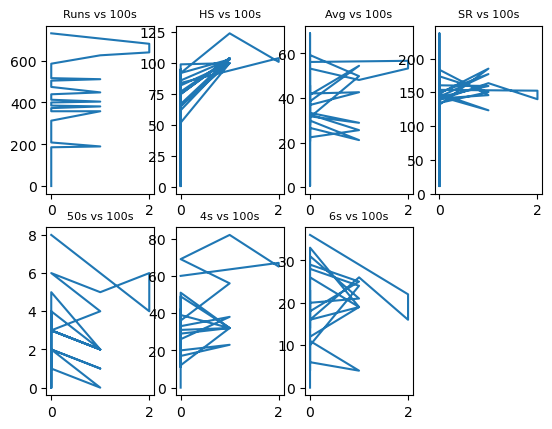

In [186]:
plt.subplot(2,4,1)
plt.plot(hundreds, Runs)
plt.title('Runs vs 100s', fontsize =8)

plt.subplot(2,4,2)
plt.plot(hundreds, HS)
plt.title('HS vs 100s', fontsize =8)

plt.subplot(2,4,3)
plt.plot(hundreds, Avg)
plt.title('Avg vs 100s', fontsize =8)

plt.subplot(2,4,4)
plt.plot(hundreds, SR)
plt.title('SR vs 100s', fontsize =8)

plt.subplot(2,4,5)
plt.plot(hundreds, fifties)
plt.title('50s vs 100s', fontsize = 8)

plt.subplot(2,4,6)
plt.plot(hundreds, fours)
plt.title('4s vs 100s', fontsize =8)

plt.subplot(2,4,7)
plt.plot(hundreds, sixes)
plt.title('6s vs 100s', fontsize =8)

#### How everything is related to 50s

Text(0.5, 1.0, '6s vs 50s')

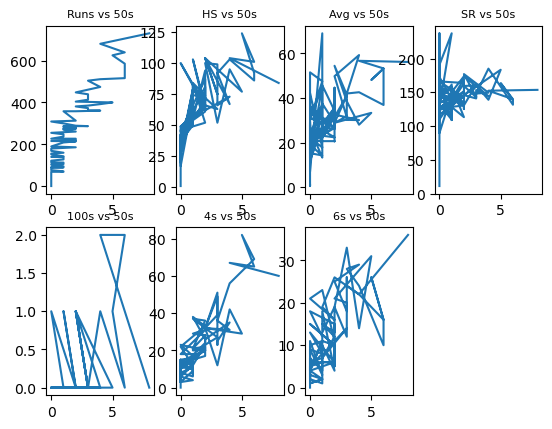

In [187]:
plt.subplot(2,4,1)
plt.plot(fifties, Runs)
plt.title('Runs vs 50s', fontsize =8)

plt.subplot(2,4,2)
plt.plot(fifties, HS)
plt.title('HS vs 50s', fontsize =8)

plt.subplot(2,4,3)
plt.plot(fifties, Avg)
plt.title('Avg vs 50s', fontsize =8)

plt.subplot(2,4,4)
plt.plot(fifties, SR)
plt.title('SR vs 50s', fontsize =8)

plt.subplot(2,4,5)
plt.plot(fifties, hundreds)
plt.title('100s vs 50s', fontsize = 8)

plt.subplot(2,4,6)
plt.plot(fifties, fours)
plt.title('4s vs 50s', fontsize =8)

plt.subplot(2,4,7)
plt.plot(fifties, sixes)
plt.title('6s vs 50s', fontsize =8)

#### How everything is related to 4s

Text(0.5, 1.0, '6s vs 4s')

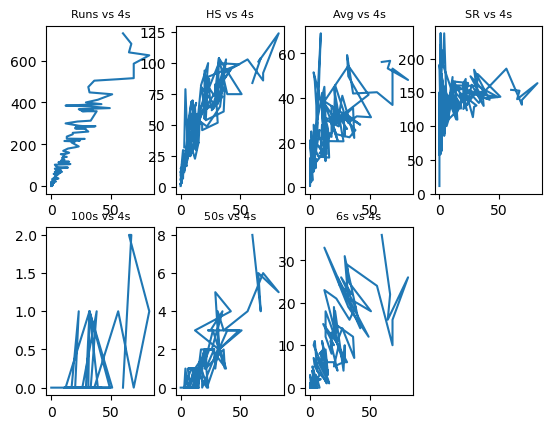

In [188]:
plt.subplot(2,4,1)
plt.plot(fours, Runs)
plt.title('Runs vs 4s', fontsize =8)

plt.subplot(2,4,2)
plt.plot(fours, HS)
plt.title('HS vs 4s', fontsize =8)

plt.subplot(2,4,3)
plt.plot(fours, Avg)
plt.title('Avg vs 4s', fontsize =8)

plt.subplot(2,4,4)
plt.plot(fours, SR)
plt.title('SR vs 4s', fontsize =8)

plt.subplot(2,4,5)
plt.plot(fours, hundreds)
plt.title('100s vs 4s', fontsize = 8)

plt.subplot(2,4,6)
plt.plot(fours, fifties)
plt.title('50s vs 4s', fontsize =8)

plt.subplot(2,4,7)
plt.plot(fours, sixes)
plt.title('6s vs 4s', fontsize =8)

#### How everything is related to 6s

Text(0.5, 1.0, '4s vs 6s')

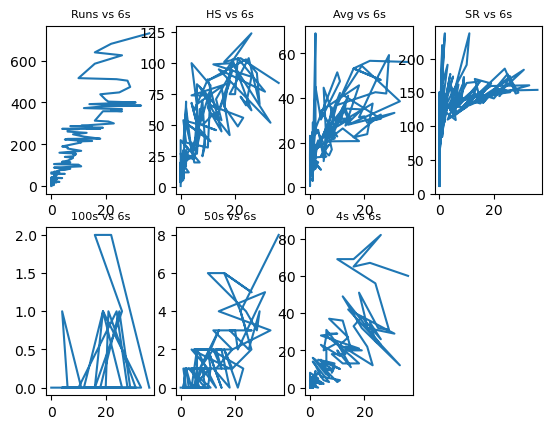

In [189]:
plt.subplot(2,4,1)
plt.plot(sixes, Runs)
plt.title('Runs vs 6s', fontsize =8)

plt.subplot(2,4,2)
plt.plot(sixes, HS)
plt.title('HS vs 6s', fontsize =8)

plt.subplot(2,4,3)
plt.plot(sixes, Avg)
plt.title('Avg vs 6s', fontsize =8)

plt.subplot(2,4,4)
plt.plot(sixes, SR)
plt.title('SR vs 6s', fontsize =8)

plt.subplot(2,4,5)
plt.plot(sixes, hundreds)
plt.title('100s vs 6s', fontsize = 8)

plt.subplot(2,4,6)
plt.plot(sixes, fifties)
plt.title('50s vs 6s', fontsize =8)

plt.subplot(2,4,7)
plt.plot(sixes, fours)
plt.title('4s vs 6s', fontsize =8)

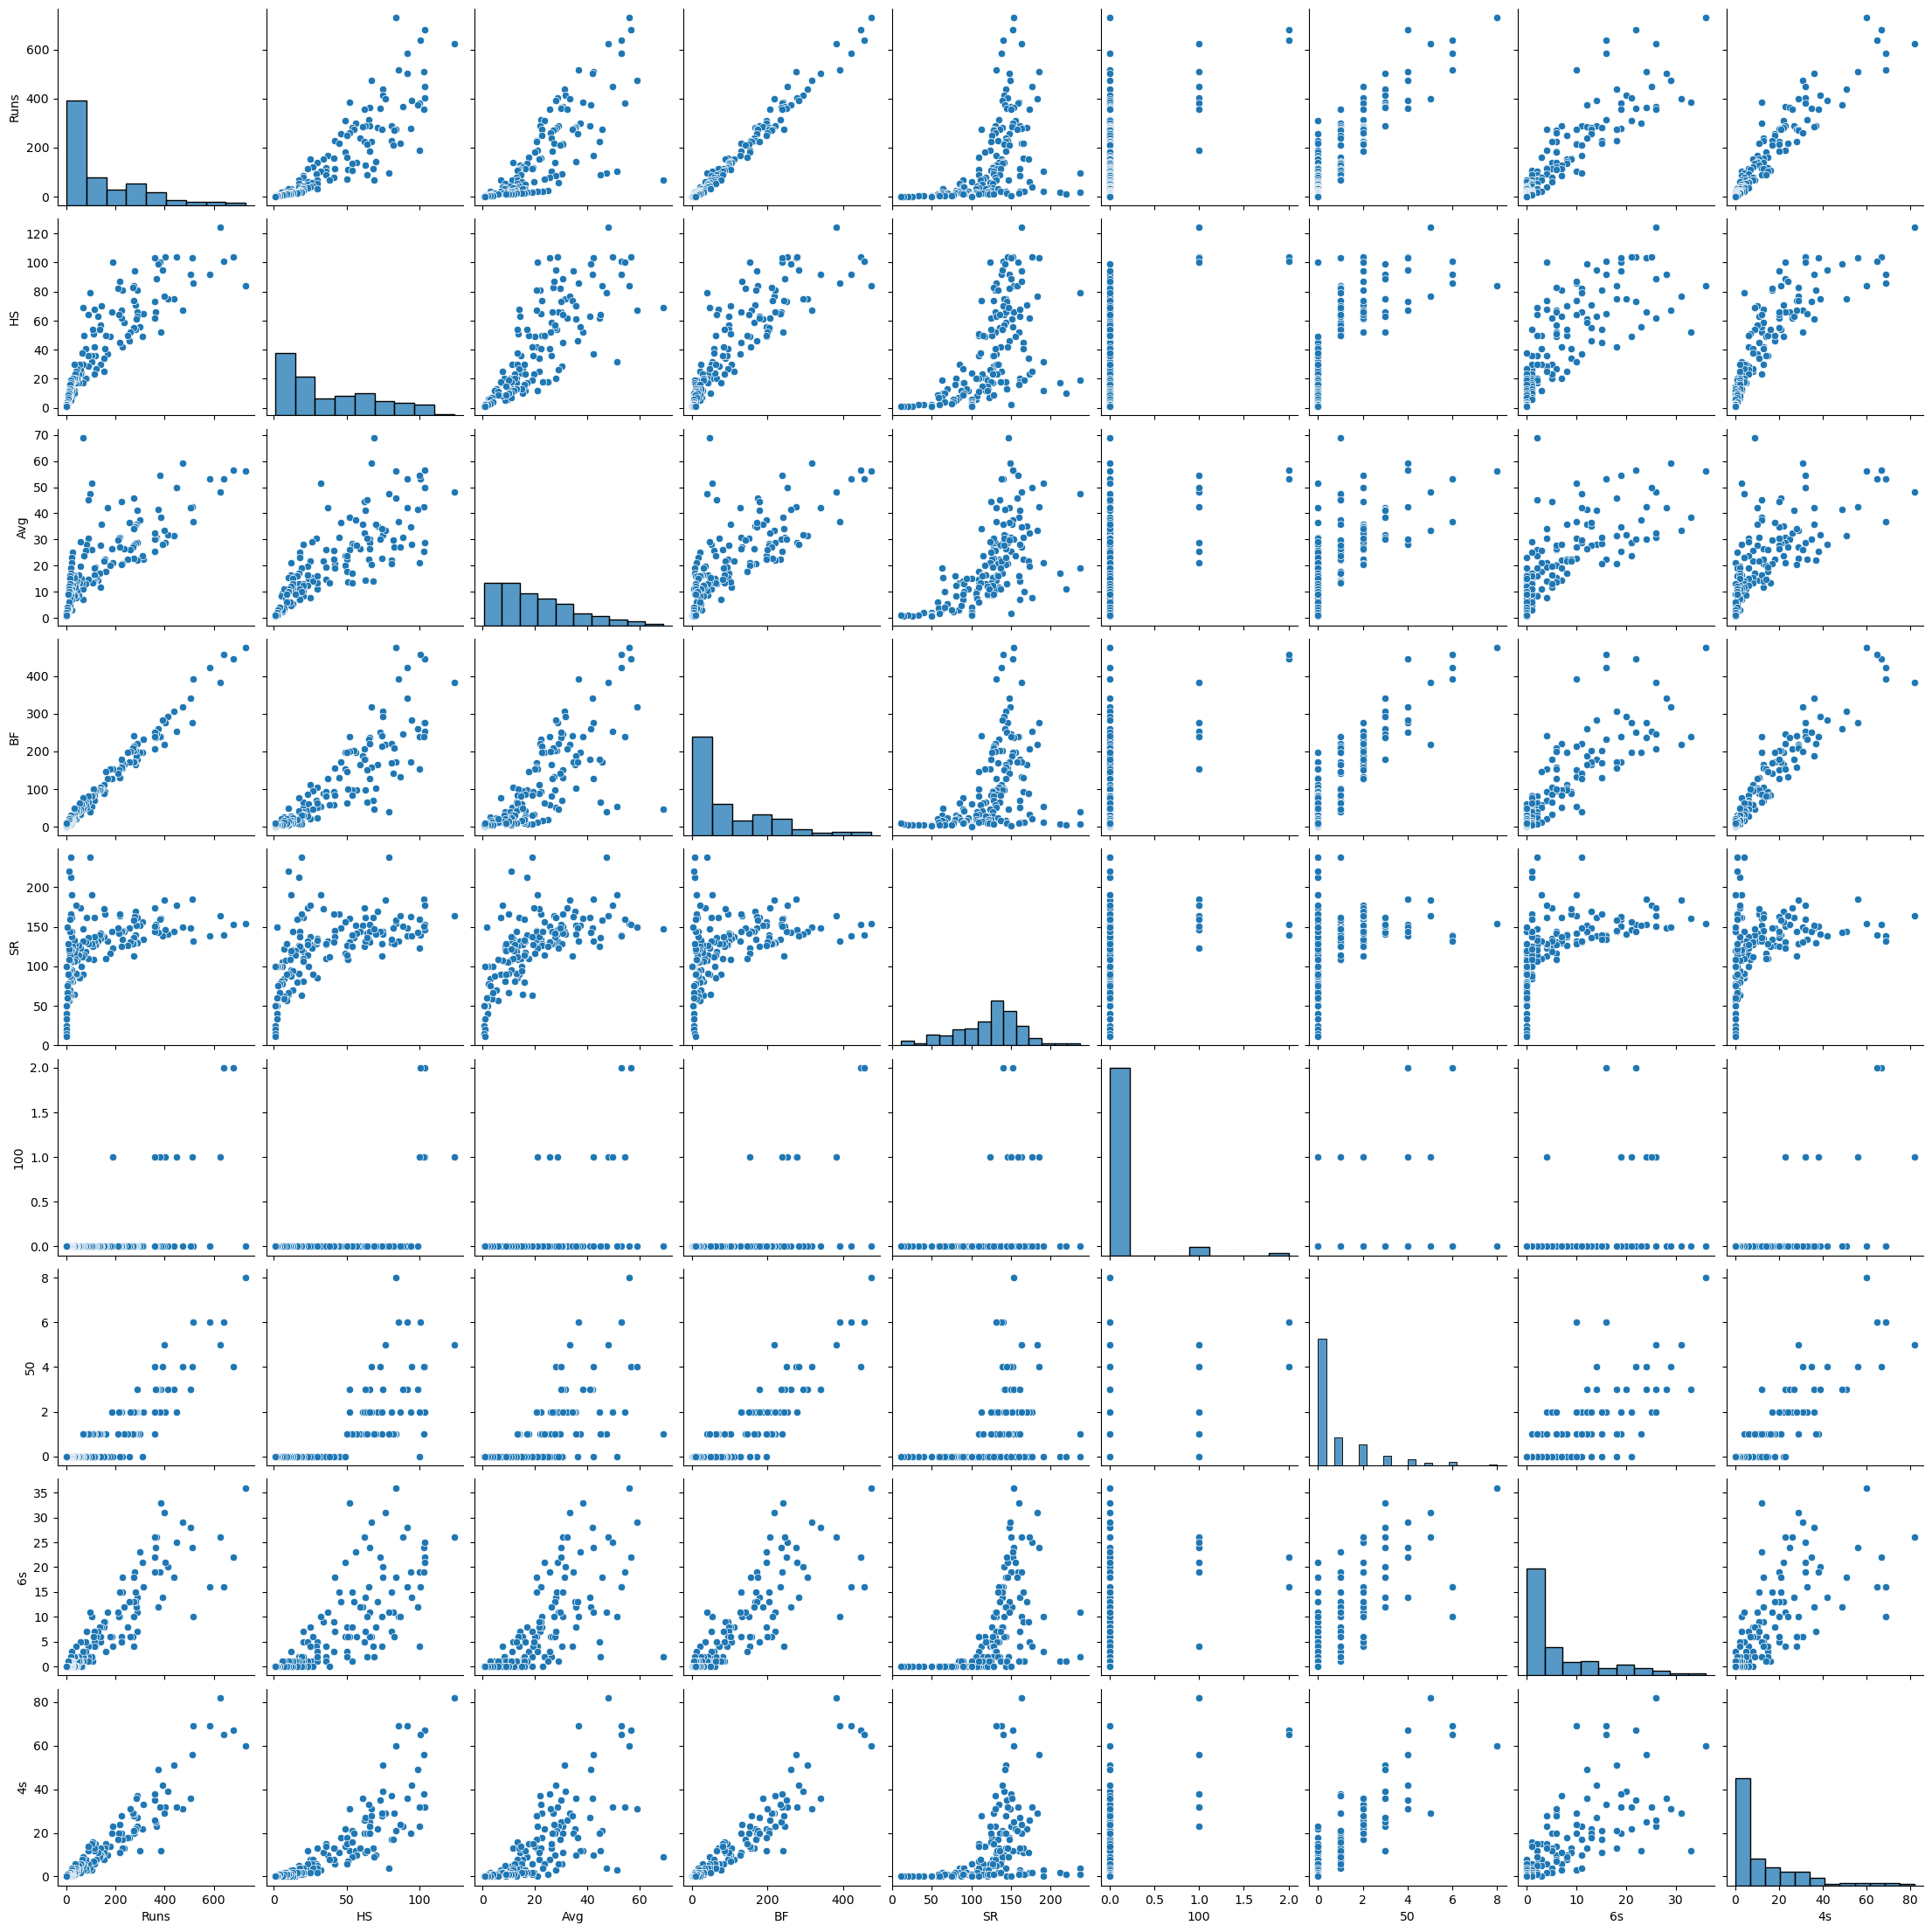

In [190]:
#TBH I just did all of what you saw above, and while learning a bit more about linear regression saw about seaborn
#And the seaborn plot is much much more beautiful that whatever I did
import seaborn as sns
imp = ipl_data[['Runs','HS','Avg','BF','SR','100','50','6s','4s']]
sns.pairplot(imp)

## Using Linear Regression to train model to find number of 4s

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
model = LinearRegression()

In [201]:
#Data Frames of required features and target
features = ipl_data[['POS','Mat','Inns','Runs','HS','Avg','BF','SR','100','50','6s']]
target = ipl_data['4s']

In [207]:
#Splitting Data using train_test_split utility from sklearn
features_train, features_test, target_train, target_test = train_test_split(features, target, shuffle=True, train_size=0.3)

In [203]:
#Training the Model on the data
model.fit(features_train, target_train)

LinearRegression()

In [204]:
#Predicting Values of test data
target_prediction = model.predict(features_test)

In [205]:
#Finding Mean squared error on predicted values
error_targetprediction = mean_squared_error(target_test, target_prediction, squared=False)
error_trainingdata = mean_squared_error(target_train, model.predict(features_train), squared = False)

In [208]:
print('The error in Training Data prediction is', error_trainingdata)
print('The error in Target Data Prediction is', error_targetprediction)
#I Trained this like 12 times with different train_size, this was the least error I got for both

The error in Training Data prediction is 2.281051386028391
The error in Target Data Prediction is 3.564429000302209


#### This model was trained by taking all the feature values
But in general all may not have a contribution to the number of 4s

In [209]:
#To see which features have more impact we can do
ipl_data[['POS','Mat','Inns','Runs','HS','Avg','BF','SR','100','50','4s','6s']].corr()['4s'].sort_values()

POS    -0.819813
SR      0.400501
100     0.527596
Mat     0.536266
Avg     0.718656
6s      0.739856
Inns    0.759598
HS      0.855627
50      0.886954
Runs    0.946171
BF      0.949104
4s      1.000000
Name: 4s, dtype: float64

In [269]:
#As we can see SR, 100, Mat have very less impact on the number of 4s and may be hindering our predictions
#So creating a second model using the other parameters and finding error:
model2 = LinearRegression()

features2 = ipl_data[['POS','Inns','BF','Runs','50','HS','6s','Avg']]
target2 = ipl_data['4s']

while((error_prediction>5)):
    features2_train, features2_test, target2_train, target2_test = train_test_split(features2, target2, shuffle=True, train_size=0.75)

    model2.fit(features2_train, target2_train)

    target2_predicted = model2.predict(features2_test)

    error_trainingdata = mean_squared_error(target2_train, model2.predict(features2_train))
    error_prediction = mean_squared_error(target2_predicted, target2_test)

print('The error in Training Data prediction is', error_trainingdata)
print('The error in Target Data Prediction is', error_prediction)

The error in Training Data prediction is 10.063436551246749
The error in Target Data Prediction is 3.7471326481027347


While loop for the win! I know it's worse than the last one, but the while loop implementation allowed me to have a bound on the maximum error I could have. I tried setting error_trainigdata to have a maximum bound to but it was taking wayy too long to compute </br>
I can implement the while loop approach on the earlier model to get a much better model too but it's 11:16 right now and I still have to do Logistic Regression part so next time

## Logistic Regression

In [198]:
for column in list(ipl_data.columns):
    print(column, ipl_data[column].unique())

POS [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163]
Player ['Faf Du Plessis' 'Shubman Gill' 'Virat Kohli' 'Yashasvi Jaiswal'
 'Devon Conway' 'David Warner' 'Suryakumar Yadav' 'Ruturaj Gaikwad'
 'Rinku Singh' 'Heinrich Klaasen' 'Ishan Kishan' 'Nitish Rana'
 'Venkatesh Iyer' 'Glenn Maxwell' 'Jos Buttler' 'Shivam Dube'
 'Cameron Green' 'Shikhar Dhawan' 'Marcus Stoinis' 'Sanju Samson'
 

The number of 100s and 50s can be predicted using logistic regression, since they are not a large range of values and have fixed classifications

### Using Logistic Regression to predict number of 50s

In [311]:
#PLEASE DONT RERUN THIS I GOT A REALLY GOOD ACCURACY FINALLY
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

predict50 = LogisticRegression(solver="newton-cholesky",max_iter=100)

#features2 = ipl_data[['POS','Mat','Inns','NO','Runs','HS','Avg','BF','SR','100','4s','6s']]
#features2 = ipl_data[['POS','Runs','Inns','HS','Avg','SR','100','4s','6s']] #ITS NOT CONVERGING!
features2 = ipl_data[['POS','Runs','4s','6s']]
target2 = ipl_data['4s']

features2_train, features2_test, target2_train, target2_test = train_test_split(features2, target2, shuffle=True, train_size=0.4)

predict50.fit(features2_train, target2_train)
target2_predicted = predict50.predict(features2_test)
#Measuring accuracy using score
accuracy = predict50.score(features2_test, target2_test)
print(accuracy)

0.3673469387755102


Sadly, No solving algo had a good accuracy within reasonable number of maximum iterations.\
Newton-Cholesky for 100 max-iter gave 0.3673469387755102 something accuracy

Logistic Regression may not be the best to model the number of 50s because there are too many options. It may have the best result for modelling number of 100s.